<a href="https://colab.research.google.com/github/sjw8793/DS2023-HateCrimeAnalysis/blob/main/HateCrime_Normalization_by_state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SSU2023_1/DataScience


In [66]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import plotly.express as px

In [3]:
df = pd.read_excel('hate_crime_dataset.xlsx')

In [4]:
df.head()

,data_year,state_abbr,state_name,division_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-12-22,1,Others,1,Simple Assault,Residence/Home,Anti-White,Individual,S,S
1,2017,AK,Alaska,Pacific,West,4,"Cities from 25,000 thru 49,999",2017-10-24,0,Unknown,1,Destruction/Damage/Vandalism of Property,School-College/University,"Anti-Multiple Races, Group",Government,S,S
2,2017,AK,Alaska,Pacific,West,8A,"Non-MSA counties 100,000 or over",2017-05-04,0,Unknown,1,Destruction/Damage/Vandalism of Property,Church/Synagogue/Temple/Mosque,Anti-Other Christian,Religious Organization,S,S
3,2017,AK,Alaska,Pacific,West,1C,"Cities from 250,000 thru 499,999",2017-10-29,1,Black or African American,1,Aggravated Assault,Amusement Park,Anti-White,Individual,S,S
4,2017,AL,Alabama,East South Central,South,7,"Cities under 2,500",2017-09-23,1,Black or African American,1,Intimidation,School-College/University,Anti-White,Individual,S,S


In [7]:
df.isna().sum()

data_year                       0
state_abbr                      0
state_name                      0
division_name                   0
region_name                     0
population_group_code           0
population_group_description    0
incident_date                   0
total_offender_count            0
offender_race                   0
victim_count                    0
offense_name                    0
location_name                   0
bias_desc                       0
victim_types                    0
multiple_offense                0
multiple_bias                   0
dtype: int64

# 정규화 전
### 2017~2021 년도별 각 주의 hate_crimes 건 수

In [8]:
df2 = df.groupby(['data_year', 'state_abbr', 'state_name']).agg(hate_crime_case = ('state_name', 'size'), number_of_victims = ('victim_count', 'sum'), NUMBER_OF_OFFENDERS = ('total_offender_count', 'sum'))
agg_data = pd.DataFrame(df2).reset_index()
agg_data.columns = ['data_year', 'state_abbr', 'state_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data

,data_year,state_abbr,state_name,hate_crime_case,number_of_victims,number_of_offenders
0,2017,AK,Alaska,4,4,2
1,2017,AL,Alabama,14,14,11
2,2017,AR,Arkansas,24,27,28
3,2017,AZ,Arizona,264,357,242
4,2017,CA,California,1094,1316,1014
...,...,...,...,...,...,...
253,2021,VT,Vermont,39,46,29
254,2021,WA,Washington,576,748,412
255,2021,WI,Wisconsin,111,121,105
256,2021,WV,West Virginia,56,75,44


In [9]:
fig=px.choropleth(agg_data,
                  locations = 'state_abbr',        
                  animation_frame = 'data_year',       
                  color = 'hate_crime_case',  
                  color_continuous_scale = 'inferno',
                  locationmode = "USA-states",
                  title='Hate Crime cases of each States (2017 - 2021)',
                  scope="usa",
                  hover_name="state_name",
                  hover_data = ['number_of_victims', 'number_of_offenders'],
                  height=700)

fig.update_layout(coloraxis_colorbar_title_text = 'Number of Cases')

fig.show()

In [10]:
# 년도별로 데이터 묶기
df_2017 = agg_data[agg_data['data_year'] == 2017]
df_2018 = agg_data[agg_data['data_year'] == 2018]
df_2019 = agg_data[agg_data['data_year'] == 2019]
df_2020 = agg_data[agg_data['data_year'] == 2020]
df_2021 = agg_data[agg_data['data_year'] == 2021]

## 2017~2021 '지역별' 각 주의 증오범죄 사건, 피해자 및 범죄자의 총 수

In [11]:
df3 = df.groupby(['state_name']).agg(hate_crime_case = ('state_name', 'size'), number_of_victims = ('victim_count', 'sum'), number_of_offenders = ('total_offender_count', 'sum'))
agg_data2 = pd.DataFrame(df3).reset_index()
agg_data2.columns = ['state_name', 'hate_crime_case','number_of_victims', 'number_of_offenders']
agg_data2

,state_name,hate_crime_case,number_of_victims,number_of_offenders
0,Alabama,284,316,268
1,Alaska,39,53,39
2,Arizona,1016,1292,839
3,Arkansas,128,146,137
4,California,4586,5508,4379
5,Colorado,974,1296,1041
6,Connecticut,473,568,325
7,Delaware,94,112,79
8,District of Columbia,804,897,857
9,Federal,553,1411,542


### state에 Federal이란 곳은 존재하지 않는데 처음 로드한 hate_crime 데이터셋 중 state_name에 Federal이 존재하네요...

# 정규화

## 인구수 데이터 전처리

In [16]:
# 2017-2020 인구수 데이터 로드 -> 전처리 필요(주 단위로만 나눈 데이터만 추합해야함)
population_dataset = pd.read_csv("Population_Estimates.csv")
# 2021 인구수 데이터 로드 -> 'Description / Population' 만 넣어둬서 따로 전처리 필요 없습니다!
pop_df_2021 = pd.read_csv("Population_Estimates_2021.csv")

In [17]:
population_dataset.head()

,IBRC_Geo_ID,Statefips,Countyfips,Description,Year,Population,Count or Estimate,State or County Release
0,0,0,0,U.S.,1970,203302031,Count,State
1,0,0,0,U.S.,1970,203302037,Estimate,County
2,0,0,0,U.S.,1980,226545805,Count,State
3,0,0,0,U.S.,1980,226542250,Estimate,County
4,0,0,0,U.S.,1990,248790925,Count,State


In [18]:
pop_df_2021.head()

,Description,Population
0,Alabama,"5,049,846"
1,Alaska,"734,182"
2,Arizona,"7,264,877"
3,Arkansas,"3,028,122"
4,California,"39,142,991"


In [19]:
# 2017-2020 population 데이터 전처리
pop_df = population_dataset[['Description', 'Year', 'Population']]

In [20]:
pop_df = pop_df[pop_df['Description'] != 'U.S.']

valid_years = [2017,2018,2019,2020]
pop_df = pop_df[pop_df['Year'].isin(valid_years)]

In [21]:
pop_df.head()

,Description,Year,Population
56,Alabama,2017,4877989
57,Alabama,2018,4891628
58,Alabama,2019,4907965
59,Alabama,2020,4921532
84,"Autauga County, AL",2017,55448


In [22]:
# 연도별로 데이터 생성
pop_df_2017 = pop_df[pop_df['Year'] == 2017]
pop_df_2018 = pop_df[pop_df['Year'] == 2018]
pop_df_2019 = pop_df[pop_df['Year'] == 2019]
pop_df_2020 = pop_df[pop_df['Year'] == 2020]

In [23]:
print(pop_df_2017['Description'].value_counts())

Alabama                1
Lawrence County, OH    1
Logan County, OH       1
Lorain County, OH      1
Lucas County, OH       1
                      ..
Johnson County, KY     1
Kenton County, KY      1
Knott County, KY       1
Knox County, KY        1
Weston County, WY      1
Name: Description, Length: 3191, dtype: int64


In [24]:
# ','를 포함한 데이터 삭제
pop_df_2017 = pop_df_2017[~pop_df_2017['Description'].str.contains(',', na=False)]
pop_df_2018 = pop_df_2018[~pop_df_2018['Description'].str.contains(',', na=False)]
pop_df_2019 = pop_df_2019[~pop_df_2019['Description'].str.contains(',', na=False)]
pop_df_2020 = pop_df_2020[~pop_df_2020['Description'].str.contains(',', na=False)]

In [34]:
# 로드한 두 데이터(주별 인구수)의 state에 대한 값이 동일한지 확인 - 대표로 2017년도만
unique_descriptions_2017 = set(pop_df_2017['Description'].unique())
unique_descriptions_2021 = set(pop_df_2021['Description'].unique())

differences = unique_descriptions_2017.symmetric_difference(unique_descriptions_2021)
num_differences = len(differences)
print("2017과 2021의 Description 값 중 다른 값의 개수:", num_differences)

2017과 2021의 Description 값 중 다른 값의 개수: 0


In [28]:
##### 저는 이미 드라이브에 한 번 저장을 해둬서 주석처리 해뒀어요! #####
# # 전처리한 인구수 데이터 다운로드
# drive.mount('/content/gdrive')
# %cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"
# file_path = '/content/drive/MyDrive/SSU2023_1/DataScience/normalized_dataset.xlsx'

# import os
# folder_path = '/content/drive/MyDrive/SSU2023_1/DataScience'

# # 경로가 존재하지 않으면 폴더 생성
# if not os.path.exists(folder_path):
#     os.makedirs(folder_path)

# pop_df_2017.to_csv('pop_df_2017.csv', index=False)
# pop_df_2018.to_csv('pop_df_2018.csv', index=False)
# pop_df_2019.to_csv('pop_df_2019.csv', index=False)
# pop_df_2020.to_csv('pop_df_2020.csv', index=False)
# pop_df_2021.to_csv('pop_df_2021.csv', index=False)

# from google.colab import files
# files.download('pop_df_2017.csv')

In [29]:
# files.download('pop_df_2018.csv')

In [30]:
# files.download('pop_df_2019.csv')

In [31]:
# files.download('pop_df_2020.csv')

In [32]:
# files.download('pop_df_2021.csv')

In [35]:
# 로드한 두 데이터(hate_crime , 인구수)의 state_name(description)에 대한 값이 동일한지 확인 - 대표로 2017년도만
unique_descriptions_hatecrime = set(df_2017['state_name'].unique())
unique_descriptions_2017 = set(pop_df_2017['Description'].unique())

differences = unique_descriptions_hatecrime.symmetric_difference(unique_descriptions_2017)
num_differences = len(differences)
print("hate_crime데이터와 주별 인구수 데이터 값 중 다른 값의 개수:", num_differences)

hate_crime데이터와 주별 인구수 데이터 값 중 다른 값의 개수: 1


In [36]:
unique_descriptions_hatecrime = set(df_2017['state_name'].unique())
unique_descriptions_2017 = set(pop_df_2017['Description'].unique())

differences = unique_descriptions_hatecrime.symmetric_difference(unique_descriptions_2017)
print("hate_crime데이터와 주별 인구수 데이터 값 중 다른 값:")
for diff in differences:
    print(diff)

hate_crime데이터와 주별 인구수 데이터 값 중 다른 값:
Federal


## 주별 인구수로 정규화 
##### 어느 주에서 범죄가 자주 발생하는지 상대적으로 비교하기 위해 각 주의 범죄 발생 건수를 해당 주의 인구수로 나누는 정규화 방법을 선택.
##### 단 값이 너무 작아 편의를 위해 1000000을 곱해줌

In [ ]:
# state_name과 Description을 기준으로 조인
merged_df = pd.merge(df_2017, pop_df_2017, left_on='state_name', right_on='Description')

# 필요한 컬럼들 선택
merged_df_2017 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']] 

# Population으로 정규화 수행
merged_df_2017['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population'] * 1000000
merged_df_2017['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population'] * 1000000
merged_df_2017['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population'] * 1000000

In [41]:
merged_df_2017.head()

,state_name,hate_crime_case,number_of_victims,number_of_offenders,Population,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
0,Alaska,4,4,2,740983,5.398235,5.398235,2.699117
1,Alabama,14,14,11,4877989,2.870035,2.870035,2.255028
2,Arkansas,24,27,28,3003855,7.989733,8.988450,9.321355
3,Arizona,264,357,242,7048088,37.456967,50.652035,34.335553
4,California,1094,1316,1014,39337785,27.810412,33.453841,25.776744


In [42]:
merged_df_2017.describe()

,hate_crime_case,number_of_victims,number_of_offenders,Population,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,143.627451,176.490196,126.941176,6.374944e+06,26.442987,32.191758,23.036335
std,202.418572,237.683518,183.592855,7.287171e+06,40.089993,43.605015,38.035542
min,1.000000,1.000000,1.000000,5.799940e+05,0.701379,0.701379,0.701379
25%,25.500000,29.000000,20.000000,1.769214e+06,7.311162,10.373127,7.574348
50%,76.000000,95.000000,58.000000,4.455590e+06,17.167736,22.464338,17.902959
75%,158.000000,218.500000,163.000000,7.238020e+06,28.042296,33.246103,24.486678
max,1094.000000,1316.000000,1014.000000,3.933778e+07,276.869623,296.953430,268.262277


In [ ]:
merged_df = pd.merge(df_2018, pop_df_2018, left_on='state_name', right_on='Description')
merged_df_2018 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2018['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population'] * 1000000
merged_df_2018['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population'] * 1000000
merged_df_2018['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population'] * 1000000

merged_df = pd.merge(df_2019, pop_df_2019, left_on='state_name', right_on='Description')
merged_df_2019 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2019['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population'] * 1000000
merged_df_2019['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population'] * 1000000
merged_df_2019['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population'] * 1000000

merged_df = pd.merge(df_2020, pop_df_2020, left_on='state_name', right_on='Description')
merged_df_2020 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2020['hate_crime_case_normalized'] = merged_df['hate_crime_case'] / merged_df['Population'] * 1000000
merged_df_2020['number_of_victims_normalized'] = merged_df['number_of_victims'] / merged_df['Population'] * 1000000
merged_df_2020['number_of_offenders_normalized'] = merged_df['number_of_offenders'] / merged_df['Population'] * 1000000

merged_df = pd.merge(df_2021, pop_df_2021, left_on='state_name', right_on='Description')
merged_df_2021 = merged_df[['state_name', 'hate_crime_case', 'number_of_victims', 'number_of_offenders', 'Population']]
merged_df_2021['Population'] = merged_df_2021['Population'].str.replace(',', '').astype(int)
merged_df_2021['hate_crime_case_normalized'] = merged_df_2021['hate_crime_case'] / merged_df_2021['Population'] * 1000000
merged_df_2021['number_of_victims_normalized'] = merged_df_2021['number_of_victims'] / merged_df_2021['Population'] * 1000000
merged_df_2021['number_of_offenders_normalized'] = merged_df_2021['number_of_offenders'] / merged_df_2021['Population'] * 1000000

In [45]:
# 필요 내용만 묶어서 연도별로 데이터 생성(정규화된 값들 기반)
normalized_dataset_2017 = merged_df_2017[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2018 = merged_df_2018[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2019 = merged_df_2019[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2020 = merged_df_2020[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]
normalized_dataset_2021 = merged_df_2021[['state_name','hate_crime_case_normalized', 'number_of_victims_normalized', 'number_of_offenders_normalized']]

In [47]:
normalized_dataset_2017.describe()

,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,51.000000,51.000000,51.000000
mean,26.442987,32.191758,23.036335
std,40.089993,43.605015,38.035542
min,0.701379,0.701379,0.701379
25%,7.311162,10.373127,7.574348
50%,17.167736,22.464338,17.902959
75%,28.042296,33.246103,24.486678
max,276.869623,296.953430,268.262277


In [50]:
normalized_dataset_2018.describe()

,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,49.000000,49.000000,49.000000
mean,27.260083,32.832134,25.725265
std,43.413586,48.553925,50.879111
min,3.352466,3.687712,2.539763
25%,10.331615,12.863253,10.294950
50%,15.376620,22.324261,15.227333
75%,26.759997,33.570556,24.859342
max,302.493655,336.577448,362.140292


In [51]:
normalized_dataset_2019.describe()

,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,51.000000,51.000000,51.000000
mean,28.114076,33.453715,26.074281
std,44.945936,50.306933,50.781988
min,0.203750,0.203750,0.203750
25%,10.676521,13.787577,9.303828
50%,19.633870,23.173297,16.611093
75%,29.292814,34.456170,25.646022
max,313.447313,354.393134,371.336232


In [52]:
normalized_dataset_2020.describe()

,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,51.000000,51.000000,51.000000
mean,33.168445,49.614877,26.696970
std,32.507171,83.278979,21.992362
min,4.846066,5.475465,2.837886
25%,14.274421,18.571697,13.124441
50%,24.164787,27.762945,20.941770
75%,39.298330,51.052803,32.855730
max,160.767885,578.565117,137.482885


In [53]:
normalized_dataset_2021.describe()

,hate_crime_case_normalized,number_of_victims_normalized,number_of_offenders_normalized
count,51.000000,51.000000,51.000000
mean,29.943643,37.155415,26.253623
std,19.488871,24.238093,16.637279
min,0.045813,0.045813,0.045813
25%,17.828247,20.772218,15.341311
50%,24.504416,30.416731,22.760536
75%,40.505625,50.039491,35.422707
max,95.695068,113.637893,80.742713


In [48]:
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/SSU2023_1/DataScience"
file_path = '/content/drive/MyDrive/SSU2023_1/DataScience/normalized_dataset.xlsx'

import os
folder_path = '/content/drive/MyDrive/SSU2023_1/DataScience'

# 경로가 존재하지 않으면 폴더 생성
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

normalized_dataset_2017.to_csv('normalized_dataset_2017.csv', index=False)
normalized_dataset_2018.to_csv('normalized_dataset_2018.csv', index=False)
normalized_dataset_2019.to_csv('normalized_dataset_2019.csv', index=False)
normalized_dataset_2020.to_csv('normalized_dataset_2020.csv', index=False)
normalized_dataset_2021.to_csv('normalized_dataset_2021.csv', index=False)

from google.colab import files
files.download('normalized_dataset_2017.csv')
files.download('normalized_dataset_2018.csv')
files.download('normalized_dataset_2019.csv')
files.download('normalized_dataset_2020.csv')
files.download('normalized_dataset_2021.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/SSU2023_1/DataScience


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('normalized_dataset_2018.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('normalized_dataset_2019.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('normalized_dataset_2020.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('normalized_dataset_2021.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 정규화 후

## 전처리 후 연도별 각 주마다의 hate_crime 건 수 시각화

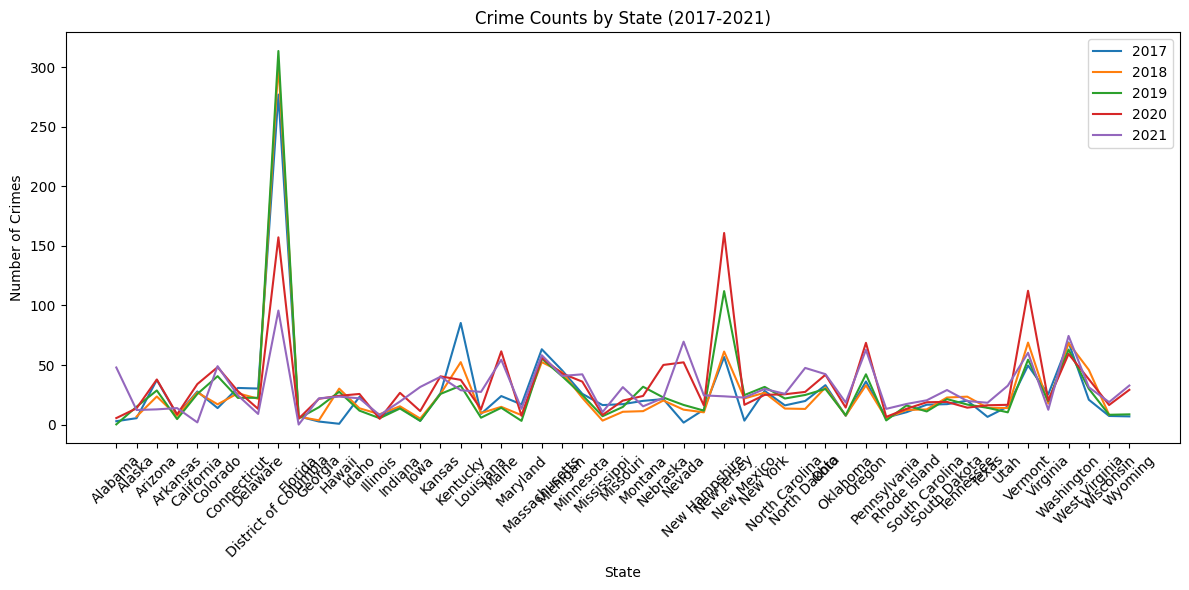

In [49]:
# 연도별 주별 범죄 발생 건 수 데이터셋 준비
crime_counts_2017 = normalized_dataset_2017.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2018 = normalized_dataset_2018.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2019 = normalized_dataset_2019.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2020 = normalized_dataset_2020.groupby('state_name')['hate_crime_case_normalized'].sum()
crime_counts_2021 = normalized_dataset_2021.groupby('state_name')['hate_crime_case_normalized'].sum()

# 시각화
plt.figure(figsize=(12, 6))

# 선 그래프(line plot)
plt.plot(crime_counts_2017.index, crime_counts_2017.values, label='2017')
plt.plot(crime_counts_2018.index, crime_counts_2018.values, label='2018')
plt.plot(crime_counts_2019.index, crime_counts_2019.values, label='2019')
plt.plot(crime_counts_2020.index, crime_counts_2020.values, label='2020')
plt.plot(crime_counts_2021.index, crime_counts_2021.values, label='2021')

plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.title('Crime Counts by State (2017-2021)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# # 데이터프레임과 주(State) 정보 매핑
# data_2017 = normalized_dataset_2017[['state_name', 'hate_crime_case_normalized']]
# data_2018 = normalized_dataset_2018[['state_name', 'hate_crime_case_normalized']]
# data_2019 = normalized_dataset_2019[['state_name', 'hate_crime_case_normalized']]
# data_2020 = normalized_dataset_2020[['state_name', 'hate_crime_case_normalized']]
# data_2021 = normalized_dataset_2021[['state_name', 'hate_crime_case_normalized']]

# # 시각화 - 2017
# fig_2017 = px.choropleth(data_2017, locations='state_name', locationmode= "USA-states", color='hate_crime_case_normalized',
#                          title='Normalized Hate Crime Cases by State (2017)', scope="usa", color_continuous_scale='YlOrRd',
#                          range_color=(0, 276))
# fig_2017.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# # 시각화 - 2018
# fig_2018 = px.choropleth(data_2018, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
#                          title='Normalized Hate Crime Cases by State (2018)', scope="usa", color_continuous_scale='YlOrRd',
#                          range_color=(0, 302))
# fig_2018.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# # 시각화 - 2019
# fig_2019 = px.choropleth(data_2019, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
#                          title='Normalized Hate Crime Cases by State (2019)', scope="usa", color_continuous_scale='YlOrRd',
#                          range_color=(0, 313))
# fig_2019.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# # 시각화 - 2020
# fig_2020 = px.choropleth(data_2020, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
#                          title='Normalized Hate Crime Cases by State (2020)', scope="usa", color_continuous_scale='YlOrRd',
#                          range_color=(0, 160))
# fig_2020.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# # 시각화 - 2021
# fig_2021 = px.choropleth(data_2021, locations='state_name', locationmode='USA-states', color='hate_crime_case_normalized',
#                          title='Normalized Hate Crime Cases by State (2021)', scope="usa", color_continuous_scale='YlOrRd',
#                          range_color=(0, 95))
# fig_2021.update_layout(coloraxis_colorbar_title_text='Normalized Cases')

# fig_2017.show()
# fig_2018.show()
# fig_2019.show()
# fig_2020.show()
# fig_2021.show()

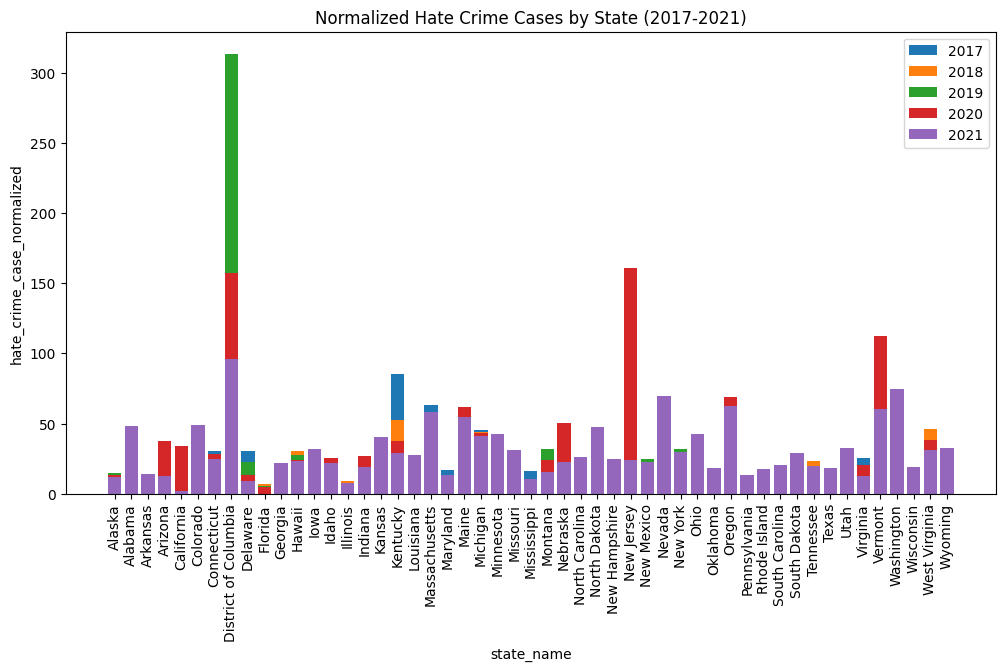

In [74]:
def get_data_for_year(year):
    if year == 2017:
        return data_2017
    elif year == 2018:
        return data_2018
    elif year == 2019:
        return data_2019
    elif year == 2020:
        return data_2020
    elif year == 2021:
        return data_2021
    else:
        return None

years = [2017, 2018, 2019, 2020, 2021]

plt.figure(figsize=(12, 6))

for year in years:
    # 해당 연도의 데이터프레임을 가져와서 사용합니다.
    data_year = get_data_for_year(year)  # 연도에 맞는 데이터 가져오는 함수를 사용해야합니다.

    plt.bar(data_year['state_name'], data_year['hate_crime_case_normalized'], label=str(year))

plt.xlabel('state_name')
plt.ylabel('hate_crime_case_normalized')
plt.title('Normalized Hate Crime Cases by State (2017-2021)')
plt.xticks(rotation=90)
plt.legend()
plt.show()
